### Adding path to import and importing stuff

In [1]:
import sys
import SimpleITK as sitk
from pathlib import Path
sys.path.append('../utils/')
import nilearn
from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi

In [2]:
from dataset import parse_raw_images, plot_random_layers, get_segmented_lungs, get_segmented_lungs_3d
from metrics import target_registration_error
import pandas as pd

### Reading the data set and creating data structure

In [3]:
out_path=Path('../result_data/')
data_path=Path('../data/')

In [4]:
data = parse_raw_images(data_path,out_path)
data
data.to_csv(out_path/'dir_lab_copd.csv')

## Visual Inspection of Data

Size: (121, 512, 512)


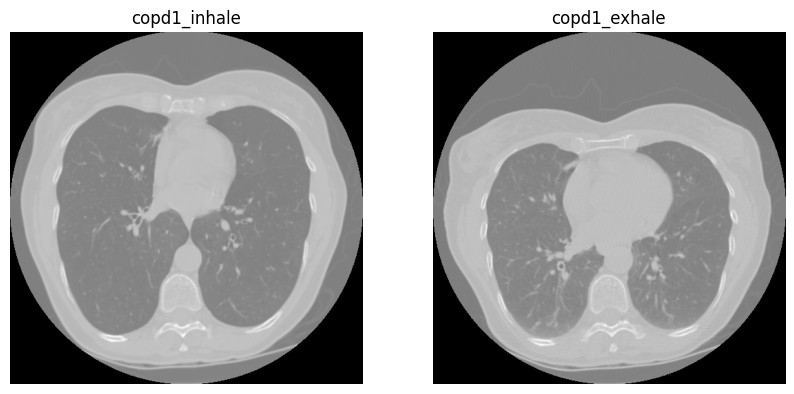

Size: (102, 512, 512)


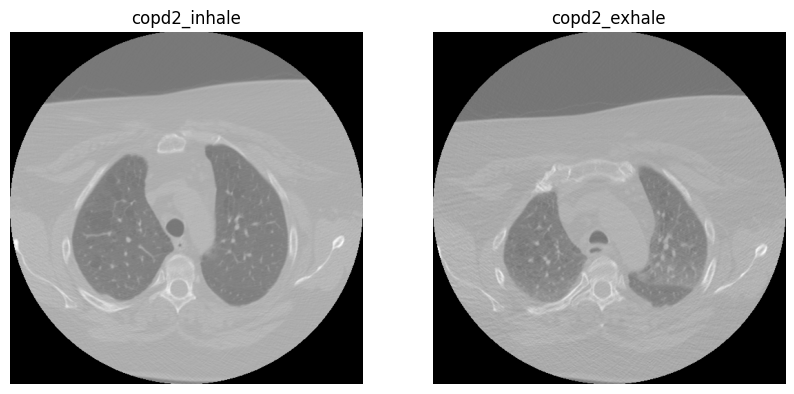

Size: (126, 512, 512)


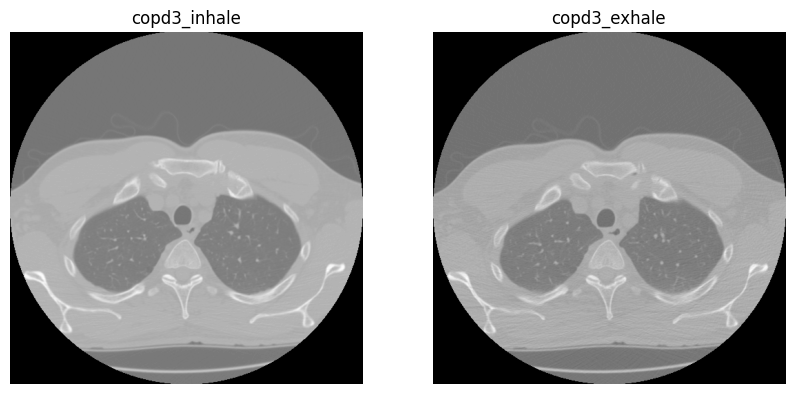

Size: (126, 512, 512)


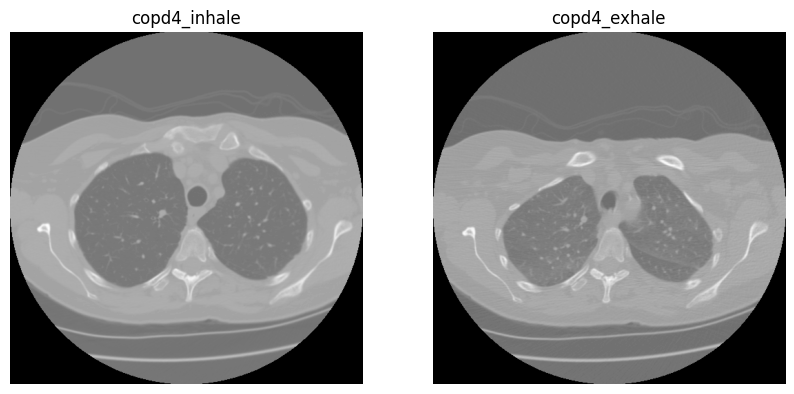

In [10]:
for i in range(len(data)):
    sample = data.iloc[i]
    plot_random_layers(sample['i_img_path'], sample['e_img_path'], sample['case'])

## Checking TRE Function

In [11]:
for i in range(len(data)):
    sample = data.iloc[i]
    vox_size = [sample['space_x'],sample['space_y'],sample['space_z']]
    i_landmark_pts = pd.read_csv(sample['i_landmark_pts'], header=None, index_col=None).values
    e_landmark_pts = pd.read_csv(sample['e_landmark_pts'], header=None, index_col=None).values
    m, s = target_registration_error(i_landmark_pts, e_landmark_pts, vox_size)
    print(f'{"-"*10} {sample["case"]} {"-"*10}')
    print(f'Provided displacement: {sample["disp_mean"]} | {sample["disp_std"]}')
    print(f'Computed displacement: {m} | {s}')

---------- copd1 ----------
Provided displacement: 25.9 | 11.57
Computed displacement: 26.33 | 11.42
---------- copd2 ----------
Provided displacement: 21.77 | 6.46
Computed displacement: 21.79 | 6.46
---------- copd3 ----------
Provided displacement: 12.29 | 6.39
Computed displacement: 12.64 | 6.38
---------- copd4 ----------
Provided displacement: 30.9 | 13.49
Computed displacement: 29.58 | 12.92


## Masks of the Lungs

In [12]:
import matplotlib.pyplot as plt
sample = data.iloc[0]
img = sitk.GetArrayFromImage(sitk.ReadImage(sample['i_img_path']))

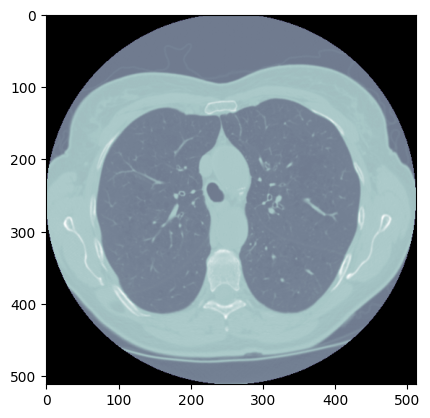

In [13]:
plt.imshow(img[40,:,:],cmap=plt.cm.bone)

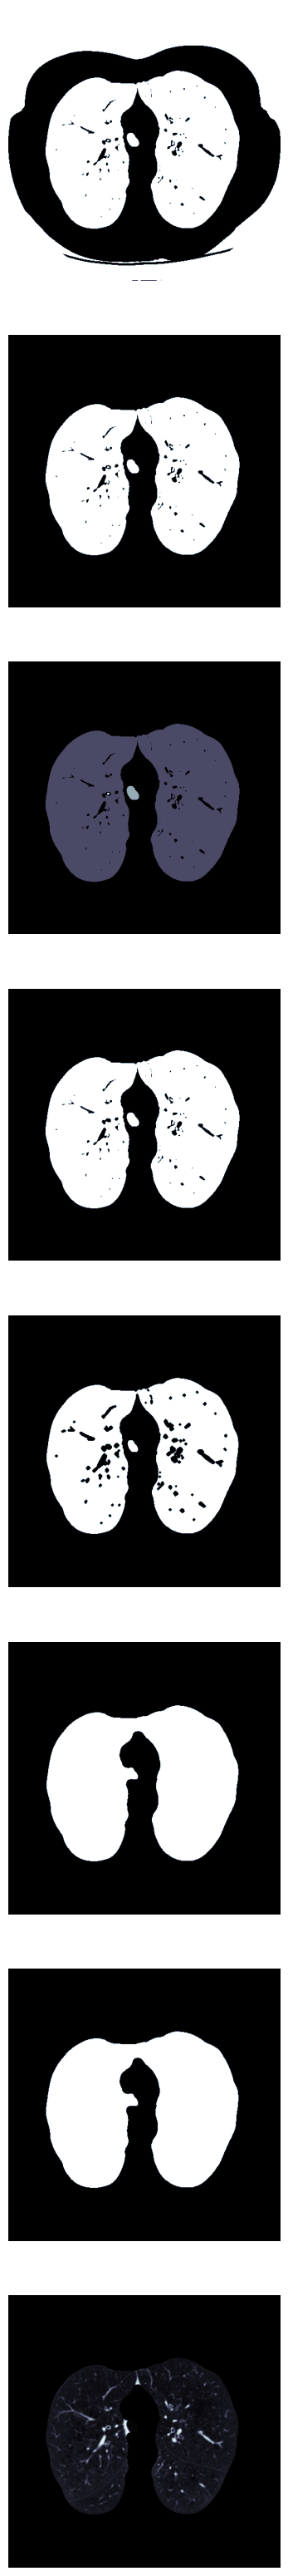

In [14]:
binary = get_segmented_lungs(img[40,:,:],plot=True)

## Checking the 3D Masks

In [15]:
masks = get_segmented_lungs_3d(img,output_path='segmented.nii.gz')

In [16]:
masks.shape

(121, 512, 512)

In [17]:
img = sitk.GetArrayFromImage(sitk.ReadImage('segmented.nii.gz'))
img.shape

(121, 512, 512)

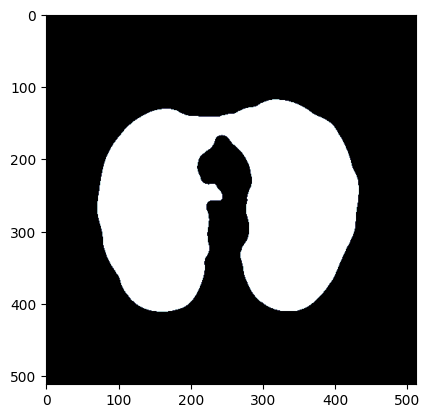

In [18]:
plt.imshow(img[40,:,:],cmap=plt.cm.bone)